In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
os.chdir('/homes/v20subra/S4B2/')

from Modular_Scripts import epochs_slicing, CCA_and_noise_floor_automation

# This is for the scalp-level CCA automation

In [8]:
subject_list = ['NDARAD481FXF', 'NDARAV945MCQ', 'NDARBK669XJQ', 'NDARCD401HGZ', 'NDARDX770PJK', 'NDAREC182WW2',
 'NDAREZ098ZPE', 'NDARFB107PVH', 'NDARGY054ENV', 'NDARHF023VG3', 'NDARHP176DPE', 'NDARJP133YL3', 'NDARKH741PL8', 'NDARKW999WZD',
 'NDARLB017MBJ', 'NDARMA875ARE', 'NDARMR242UKQ', 'NDARNE511XHU', 'NDARNT042GRA', 'NDARPE596LZL', 'NDARPR768KT4', 'NDARRA733VWX',
 'NDARRD720XZK', 'NDARRN619WHY', 'NDARTR840XP1', 'NDARUJ646APQ', 'NDARVN646NZP', 'NDARWJ087HKJ', 'NDARWV470ATB', 'NDARXB704HFD',
 'NDARXJ468UGL', 'NDARXJ696AMX', 'NDARXU679ZE8', 'NDARXY337ZH9', 'NDARYM257RR6', 'NDARYX530MZU', 'NDARYY218AGA', 'NDARYZ408VWW',
 'NDARZB377WZJ', 'NDARZF288FB7', 'NDARZJ414CAA', 'NDARZT772PU4']

##################################
# dataset files check#############@


data_present = list()
for i in range(1, len(subject_list)+1):
    path_to_file = '/users/local/Venkatesh/HBN/%s/RestingState_data.csv' % subject_list[i-1]
    path_to_file_video = '/users/local/Venkatesh/HBN/%s/Video3_event.csv' % subject_list[i-1]

    if (os.path.isfile(path_to_file) and os.path.isfile(path_to_file_video)):
        data_present.append (subject_list[i-1])
        
epochs_bundle_scalp = list()
for i in range(len(data_present)):

    raw_video,events_video = mne.io.read_raw_fif(f'/users/local/Venkatesh/Generated_Data/importing/video-watching/{data_present[i]}/raw.fif'),np.load(f'/users/local/Venkatesh/Generated_Data/importing/video-watching/{data_present[i]}/events.npz')['video_watching_events']
    epochs = epochs_slicing.epochs(raw_video,events_video,[83,103,9999], tmin=0, tmax=170, fs = 500, epochs_to_slice='83')
    info_d = mne.create_info(raw_video.info['ch_names'],sfreq=125,ch_types = 'eeg')
    indexed_epochs = epochs.get_data()[:,:,:]
    globals()[f"epochs{i}_ISC"] = (mne.EpochsArray(indexed_epochs,mne.create_info(raw_video.info['ch_names'],sfreq=500,ch_types = 'eeg'))).resample(125)
    epochs_bundle_scalp.append(globals()[f"epochs{i}_ISC"])

Opening raw data file /users/local/Venkatesh/Generated_Data/importing/video-watching/NDARAD481FXF/raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 111) active
    Range : 0 ... 86035 =      0.000 ...   172.070 secs
Ready.
Not setting metadata
Not setting metadata
3 matching events found
Setting baseline interval to [0.0, 170.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 3 events and 85001 original time points ...
1 bad epochs dropped
Not setting metadata
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Opening raw data file /users/local/Venkatesh/Generated_Data/importing/video-watching/NDARBK669XJQ/raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 111) active
    Range : 0 ... 86058 =      0.000 ...   172.116 secs
Ready.
Not setting metadata


In [12]:
isc_scalp, nf_scalp = CCA_and_noise_floor_automation.CCAfy( 
epochs= np.reshape(np.array(epochs_bundle_scalp), (25,91,21250)),
how_many_channels_for_CCA= 91,
need_noise_floor=True,
how_many_subjects=25,
how_many_trials_for_noise_floor = 10)

train_cca - calculations started. There are 1 conditions
Condition has 25 subjects, 91 sensors and 21250 samples
Elapsed time: 2 seconds.
apply_cca - calculations started


  0%|          | 0/10 [00:00<?, ?it/s]

# This is for the source-level CCA automation

In [3]:
video_watching_bundle_STC = np.load('/users/local/Venkatesh/Generated_Data/25_subjects/video_watching_bundle_STC_parcellated.npz')['video_watching_bundle_STC_parcellated']


isc_source = CCA_and_noise_floor_automation.CCAfy(
epochs = video_watching_bundle_STC,
how_many_channels_for_CCA= 360,
need_noise_floor = False,
how_many_subjects = 10,
how_many_trials_for_noise_floor = 1000)

train_cca - calculations started. There are 1 conditions
Condition has 25 subjects, 360 sensors and 21250 samples
Elapsed time: 17 seconds.
apply_cca - calculations started


In [40]:
# np.savez_compressed('/users/local/Venkatesh/Generated_Data/25_subjects/noise_floor_source',sourceCCA =nf_source)
np.savez_compressed('/users/local/Venkatesh/Generated_Data/25_subjects/isc_source_rstate_corrected',sourceISC =isc_source['condition1']['ISC_persecond'])

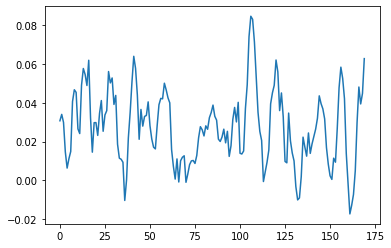

In [4]:
plt.plot(isc_source['condition1']['ISC_persecond'][0])